In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', palette='Accent')

In [50]:
df = pd.read_csv('D:/PGPDSE/SLC/SMSSpamCollection.csv')
display(df.head())

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [52]:
df['Class'] = df['Class'].map({'spam' : 1, 'ham' : 0})

In [53]:
X = df['sms']
y = df['Class']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')

In [56]:
#vect.get_stop_words()

In [57]:
X_traint = vect.fit_transform(X_train) # A matrix with 1 row
X_testt = vect.transform(X_test)

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

mnb = MultinomialNB()
mnb.fit(X_traint, y_train)

y_train_pred = mnb.predict(X_traint)
y_train_prob = mnb.predict_proba(X_traint)[:, 1]

print('Confusion Matrix Train \n', confusion_matrix(y_train, y_train_pred))
print("Accuracy on Train:", accuracy_score(y_train, y_train_pred))
print("AUC on Train:", roc_auc_score(y_train, y_train_prob))

y_test_pred = mnb.predict(X_testt)
y_test_prob = mnb.predict_proba(X_testt)[:, 1]

print()
print('Confusion Matrix Test \n', confusion_matrix(y_test, y_test_pred))
print("Accuracy on Test:", accuracy_score(y_test, y_test_pred))
print("AUC on Test:", roc_auc_score(y_test, y_test_prob))

Confusion Matrix Train 
 [[3373   12]
 [  10  505]]
Accuracy on Train: 0.9943589743589744
AUC on Train: 0.9958176420817141

Confusion Matrix Test 
 [[1433    7]
 [  16  216]]
Accuracy on Test: 0.986244019138756
AUC on Test: 0.9847341954022989


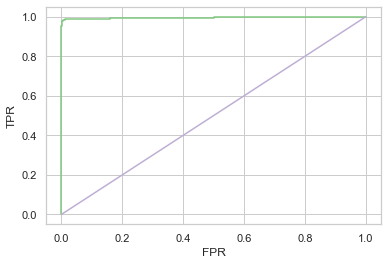

In [59]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [60]:
roc = pd.DataFrame({'fpr' : fpr, 'tpr' : tpr, 'thresholds' : thresholds})
display(roc.head())

,fpr,tpr,thresholds
0,0.0,0.000000,2.0
1,0.0,0.349515,1.0
2,0.0,0.376699,1.0
3,0.0,0.396117,1.0
4,0.0,0.401942,1.0


In [61]:
display(roc[roc['fpr'] == 0])

,fpr,tpr,thresholds
0,0.0,0.000000,2.000000
1,0.0,0.349515,1.000000
2,0.0,0.376699,1.000000
3,0.0,0.396117,1.000000
4,0.0,0.401942,1.000000
5,0.0,0.417476,1.000000
6,0.0,0.429126,1.000000
7,0.0,0.434951,1.000000
8,0.0,0.442718,1.000000
9,0.0,0.448544,1.000000


In [62]:
thresholds[0] = thresholds[0] - 1
roc = pd.DataFrame({'fpr' : fpr, 'tpr' : tpr, 'thresholds' : thresholds})
display(roc.head())

,fpr,tpr,thresholds
0,0.0,0.000000,1.0
1,0.0,0.349515,1.0
2,0.0,0.376699,1.0
3,0.0,0.396117,1.0
4,0.0,0.401942,1.0


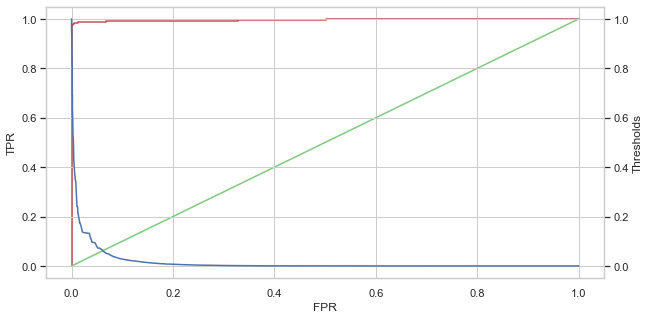

In [63]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(fpr, tpr, 'r')
ax.plot(fpr, fpr)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax2 = ax.twinx()
ax2.plot(fpr, thresholds, 'b')
ax2.set_ylabel("Thresholds")
plt.show()